## Make a recommendation for what type of content we should have on Zuckflix. In addition to your overall recommendation, pick a country  and make a recommendation for the type of content we should have  for that country in particular.

### Country: America
### Questions: 
#####               What generes have gotton more or less popular?
#####               Trends in the length of movies
#####               Trends in the number of seasons of TV shows?
#####               Certain actors / directors that Nexflix seems to like in US?

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
plt.style.use('seaborn-white')

import warnings
warnings.filterwarnings("ignore")

## 1. Read Data

In [5]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Feature Engineering

In [6]:
# type column have only 2 kind of values so we will convert it into category datatype
df['type'] = df['type'].astype('category')
df['type'].dtype

CategoricalDtype(categories=['Movie', 'TV Show'], ordered=False)

In [7]:
# date_added should be in date
df['date_added'] = df['date_added'].astype('datetime64')
df.dtypes['date_added']

dtype('<M8[ns]')

In [8]:
# checking missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
# country have 831 missing values so we will fill them using maximum occered country (mode)
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [10]:
# date_added column have 10 missing values so we are taking dataframe from those in which values are present in it
# basically we are dropin those in which date_added is missing(using just another way via notna() method)
df=df[df['date_added'].notna()]

In [11]:
# 4 rating are missing so we will fill them using maximum occering value  which is mode
df['rating'].fillna(df['rating'].value_counts().index[0], inplace=True)

In [12]:
# 3 values are missing in duration 
df[df['duration'].isna()]             # we can see that duration values are placaed in rating 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [13]:
df.loc[[5541,5794,5813],'duration'] = df.loc[[5541,5794,5813]]['rating'].values   # filled with rating column values

In [14]:
df.loc[[5541,5794,5813],'rating'] = [np.NaN,np.NaN,np.NaN]                         # filled rating column with nan

In [15]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [16]:
# 3 rating are Nan because of above code so we will fill them using maximum occering value  which is mode
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   category      
 2   title         8797 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7972 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [18]:
# checking entire row is duplicating or not
df.duplicated().sum()

0

In [19]:
df[df['title'].duplicated()]               # they are not movies so we will drop them and thier original movie aslo

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [20]:
# droing duplicated and wrong values from dataframe
df.drop(df[df['title'].duplicated(keep=False)].index, inplace=True)
df['title'].duplicated().sum()                                           # after dropping, check

0

In [21]:
df['date_added'] = df['date_added'].astype('datetime64')

In [22]:
df['month_added'] = df['date_added'].apply(lambda x: x.strftime("%B"))

In [23]:
df['year_added'] = df['date_added'].apply(lambda x: x.year)

In [24]:
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [25]:
# creating new feature
df['targeted_age'] = df['rating'].replace(rating_ages)

In [26]:
df['targeted_age'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids'], dtype=object)

In [27]:
# there are only 4 unique category of targeted_age so we will convert it into category
df['targeted_age'] = df['targeted_age'].astype('category')

In [28]:
country_filter = []
for i in df['country']:
    if 'United States' in str(i):
        country_filter.append(True)
    else:
        country_filter.append(False)

In [29]:
df_us_alltime = df[country_filter]
df_us_alltime.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults


In [30]:
df_us_recent_three_years = df_us_alltime[df_us_alltime['year_added'] > 2018]
df_us_recent_three_years.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults


## 3. Keywords in Description 

In [31]:
import nltk
from textblob import Word
from textblob import TextBlob

from nltk.corpus import stopwords
stopword_list = stopwords.words("english")

import re

In [32]:
# lower texts
df_us_recent_three_years['clean_description'] = df_us_recent_three_years['description'].apply(lambda x: \
        ' '.join(x.lower() for x in x.split()))
df_us_alltime['clean_description'] = df_us_alltime['description'].apply(lambda x: \
        ' '.join(x.lower() for x in x.split()))


# Remove symbols
df_us_recent_three_years['clean_description'] = df_us_recent_three_years['clean_description'].str.replace('[^\w\s]', '')
df_us_alltime['clean_description'] = df_us_alltime['clean_description'].str.replace('[^\w\s]', '')

# Lemmatize
df_us_recent_three_years['clean_description'] = df_us_recent_three_years['clean_description'].apply(lambda x: \
        ' '.join([Word(word).lemmatize() for word in x.split()]))
df_us_alltime['clean_description'] = df_us_alltime['clean_description'].apply(lambda x: \
        ' '.join([Word(word).lemmatize() for word in x.split()]))


# Remove stop words
df_us_recent_three_years['clean_description'] = df_us_recent_three_years['clean_description'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in stopword_list and len(x)>2))
df_us_alltime['clean_description'] = df_us_alltime['clean_description'].apply(lambda x: ' '.join(x
        for x in x.split() if x not in stopword_list and len(x)>2))

In [33]:
customized_stop_word = ['life','new','take','world','two','get','woman',
                       'year','true','must','back','one','look','big','around','keep',
                       'start', 'real','fun','based', 'join','five']

In [34]:
from collections import Counter

In [35]:
all_time_words = []

for t in df_us_alltime['clean_description']:
    for w in t.split(" "):
        if w not in customized_stop_word:
            all_time_words.append(w)

In [36]:
alltime_word_counts = Counter(all_time_words)
alltime_word_counts = sorted(alltime_word_counts.items(), key = lambda x:x[1], reverse = True)
alltime_word_counts = pd.Series(dict(alltime_word_counts))

In [37]:
alltime_word_counts[:30]

family         321
friend         310
find           309
young          277
series         247
documentary    242
story          199
love           186
school         175
help           174
team           168
home           168
man            164
special        157
save           149
teen           146
show           143
group          138
high           137
comedy         130
set            128
three          127
adventure      117
star           117
make           114
turn           114
father         113
power          112
fight          111
standup        111
dtype: int64

In [38]:
recent_three_year_time_words = []

for t in df_us_recent_three_years['clean_description']:
    for w in t.split(" "):
        if w not in customized_stop_word:
            recent_three_year_time_words.append(w)

In [39]:
recent_three_year_word_counts = Counter(recent_three_year_time_words)
recent_three_year_word_counts = sorted(recent_three_year_word_counts.items(), key = lambda x:x[1], reverse = True)
recent_three_year_word_counts = pd.Series(dict(recent_three_year_word_counts))

In [40]:
recent_three_year_word_counts[:30]

family         237
find           215
friend         207
young          178
series         160
love           135
home           129
help           128
documentary    125
school         118
man            116
team           113
story          112
teen           111
save           108
group          107
special         96
high            90
turn            86
father          84
time            83
show            82
daughter        81
secret          81
three           80
make            79
set             79
try             78
adventure       77
town            76
dtype: int64

In [41]:
# from another notebook
increasingly_popular_keywords = ['save',
 'time',
 'docuseries',
 'secret',
 'dream',
 'share',
 'try',
 'force',
 'power',
 'daughter',
 'crime']

## 3. Some Exploratory Visualization

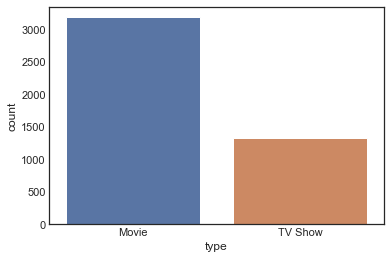

In [42]:
sns.countplot(x=df_us_alltime['type'])
plt.show()

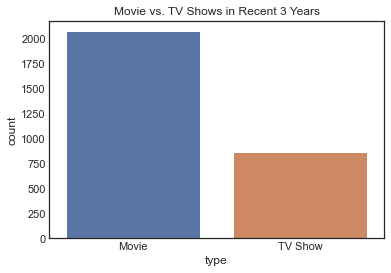

In [43]:
sns.countplot(x=df_us_recent_three_years['type'])
plt.title('Movie vs. TV Shows in Recent 3 Years')
plt.show()

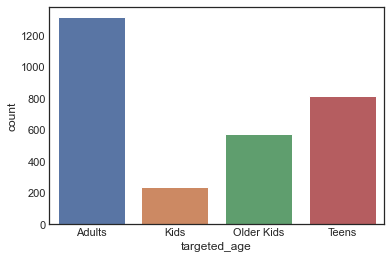

In [44]:
sns.countplot(x=df_us_recent_three_years['targeted_age'])
plt.show()

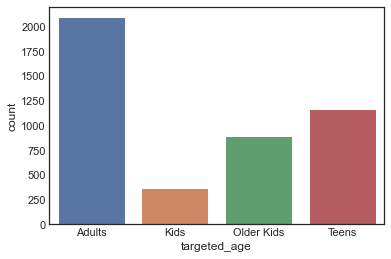

In [45]:
sns.countplot(x=df_us_alltime['targeted_age'])
plt.show()

## 4. Target Age Trends

In [46]:
from collections import defaultdict

In [47]:
target_age_by_year = defaultdict(dict)

In [48]:
for i in sorted(df_us_alltime['year_added'].unique()):
    df_us_this_year = df_us_alltime[df_us_alltime['year_added'] == i]
    row1 = df_us_this_year.shape[0]
    
    for t in df_us_this_year['targeted_age'].unique():
        df_us_this_year_age = df_us_this_year[df_us_this_year['targeted_age'] == t]
        row2 = df_us_this_year_age.shape[0]
        age_percent = round(row2/row1, 2)
        target_age_by_year[i][t] = age_percent

In [49]:
target_age_by_year

defaultdict(dict,
            {2008: {'Adults': 1.0},
             2009: {'Adults': 1.0},
             2010: {'Adults': 1.0},
             2011: {'Teens': 0.42, 'Adults': 0.17, 'Older Kids': 0.42},
             2012: {'Older Kids': 0.67, 'Adults': 0.33},
             2013: {'Kids': 0.1,
              'Older Kids': 0.1,
              'Adults': 0.6,
              'Teens': 0.2},
             2014: {'Adults': 0.5,
              'Teens': 0.09,
              'Older Kids': 0.32,
              'Kids': 0.09},
             2015: {'Adults': 0.5,
              'Teens': 0.23,
              'Kids': 0.1,
              'Older Kids': 0.17},
             2016: {'Teens': 0.19,
              'Adults': 0.46,
              'Kids': 0.08,
              'Older Kids': 0.27},
             2017: {'Adults': 0.48,
              'Teens': 0.25,
              'Kids': 0.07,
              'Older Kids': 0.19},
             2018: {'Adults': 0.51,
              'Older Kids': 0.18,
              'Teens': 0.22,
             

In [50]:
year_that_has_adults = []
adults_over_year = []
for i in target_age_by_year.items():
    if 'Adults' in i[1].keys():
        year_that_has_adults.append(i[0])
        adults_over_year.append(i[1].get('Adults'))

In [51]:
year_that_has_adults

[2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [52]:
adults_over_year

[1.0, 1.0, 1.0, 0.17, 0.33, 0.6, 0.5, 0.5, 0.46, 0.48, 0.51, 0.46, 0.45, 0.43]

Text(0.5, 1.0, 'Adults')

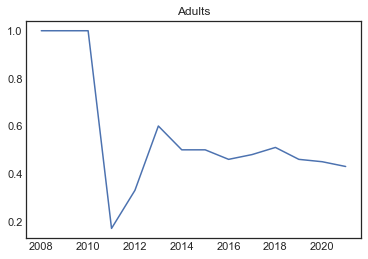

In [53]:
plt.plot(year_that_has_adults, adults_over_year)
plt.title('Adults')

In [54]:
year_that_has_kids = []
kids_over_year = []
for i in target_age_by_year.items():
    if 'Kids' in i[1].keys():
        year_that_has_kids.append(i[0])
        kids_over_year.append(i[1].get('Kids'))

In [55]:
year_that_has_kids

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

Text(0.5, 1.0, 'Kids')

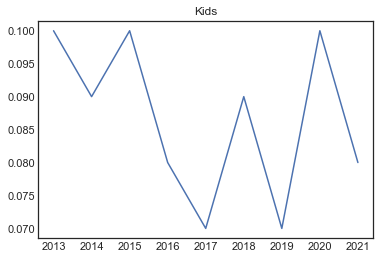

In [112]:
plt.plot(year_that_has_kids, kids_over_year)
plt.title('Kids')

In [57]:
year_that_has_older_kids = []
older_kids_over_year = []
for i in target_age_by_year.items():
    if 'Older Kids' in i[1].keys():
        year_that_has_older_kids.append(i[0])
        older_kids_over_year.append(i[1].get('Older Kids'))

Text(0.5, 1.0, 'Older Kids')

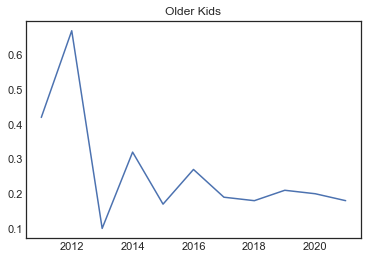

In [113]:
plt.plot(year_that_has_older_kids, older_kids_over_year)
plt.title('Older Kids')

In [59]:
year_that_has_teens = []
teens_over_year = []
for i in target_age_by_year.items():
    if 'Teens' in i[1].keys():
        year_that_has_teens.append(i[0])
        teens_over_year.append(i[1].get('Teens'))

Text(0.5, 1.0, 'Teens')

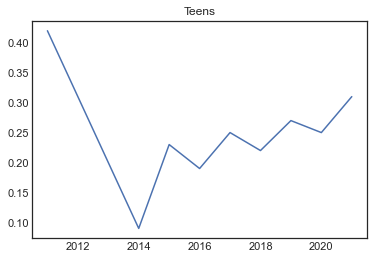

In [114]:
plt.plot(year_that_has_teens, teens_over_year)
plt.title('Teens')

## 5. Movie Length & TV Shows Seasons Trends

In [61]:
df_us_alltime.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age,clean_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens,father nears end life filmmaker kirsten johnso...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults,feud flirtation toilet talk among incarcerated...


In [62]:
df_us_alltime_movie = df_us_alltime[df_us_alltime['type'] == 'Movie']
df_us_alltime_movie['duration'] = df_us_alltime_movie['duration'].apply(
    lambda x: int(x.split(' ')[0]))
df_us_alltime_movie.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age,clean_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens,father nears end life filmmaker kirsten johnso...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021,Older Kids,equestrias divided brighteyed hero belief eart...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",September,2021,Adults,photo shoot ghana american model slip back tim...


In [63]:
df_us_alltime_movie_this_year = df_us_alltime_movie[df_us_alltime_movie['year_added'] == 2020]
df_us_alltime_movie_this_year_this_month = df_us_alltime_movie_this_year[df_us_alltime_movie_this_year['month_added'] == 'u']
np.mean(df_us_alltime_movie_this_year_this_month['duration'])

nan

In [64]:
duration_all_month = []
for i in sorted(df_us_alltime_movie['year_added'].unique()):
    df_us_alltime_movie_this_year = df_us_alltime_movie[df_us_alltime_movie['year_added'] == i]
    for t in ['January','February','March','April','May','June','July','August','October','November','December']:
        df_us_alltime_movie_this_year_this_month = df_us_alltime_movie_this_year[df_us_alltime_movie_this_year['month_added'] == t]
        duration_all_month.append(round(np.mean(df_us_alltime_movie_this_year_this_month['duration']),2))
duration_all_month

[81.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 29.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 84.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 94.27,
 nan,
 nan,
 nan,
 76.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 84.0,
 26.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 72.0,
 80.0,
 115.0,
 99.0,
 72.0,
 nan,
 35.0,
 nan,
 78.0,
 80.0,
 94.0,
 75.0,
 75.0,
 66.2,
 72.0,
 70.67,
 72.33,
 84.0,
 83.2,
 88.0,
 80.5,
 62.0,
 90.0,
 76.5,
 69.33,
 37.91,
 77.11,
 76.25,
 85.27,
 71.0,
 84.25,
 93.0,
 73.5,
 76.83,
 79.27,
 83.15,
 83.36,
 85.35,
 75.92,
 85.56,
 87.73,
 86.87,
 84.44,
 93.24,
 85.53,
 95.1,
 84.76,
 84.27,
 90.25,
 90.56,
 90.2,
 71.82,
 96.39,
 91.7,
 87.34,
 95.83,
 87.24,
 85.56,
 103.48,
 77.1,
 95.85,
 92.42,
 87.04,
 92.96,
 83.15,
 96.15,
 90.54,
 100.78,
 96.89,
 102.12,
 95.95,
 89.0,
 98.51,
 103.94,
 98.52,
 95.53,
 92.72,
 94.48,
 90.44,
 91.07,
 

In [65]:
temp_str = ','.join(str(x) for x in duration_all_month)
temp_str = temp_str.replace('nan', str(np.nanmean(duration_all_month)))
duration_all_month = [x for x in temp_str.split(',')]
duration_all_month_new = []
for i in duration_all_month:
    duration_all_month_new.append(i.split('.')[0])
duration_all_month_new

['81',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '29',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '94',
 '84',
 '84',
 '84',
 '76',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '26',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '84',
 '72',
 '80',
 '115',
 '99',
 '72',
 '84',
 '35',
 '84',
 '78',
 '80',
 '94',
 '75',
 '75',
 '66',
 '72',
 '70',
 '72',
 '84',
 '83',
 '88',
 '80',
 '62',
 '90',
 '76',
 '69',
 '37',
 '77',
 '76',
 '85',
 '71',
 '84',
 '93',
 '73',
 '76',
 '79',
 '83',
 '83',
 '85',
 '75',
 '85',
 '87',
 '86',
 '84',
 '93',
 '85',
 '95',
 '84',
 '84',
 '90',
 '90',
 '90',
 '71',
 '96',
 '91',
 '87',
 '95',
 '87',
 '85',
 '103',
 '77',
 '95',
 '92',
 '87',
 '92',
 '83',
 '96',
 '90',
 '100',
 '96',
 '102',
 '95',
 '89',
 '98',
 '103',
 '98',
 '95',
 '92',
 '94',
 '90',
 

In [66]:
duration_all_month_new_new = []
for i in duration_all_month_new:
    duration_all_month_new_new.append(int(i))

In [67]:
duration_all_month_new_new[:5]

[81, 84, 84, 84, 84]

In [68]:
timeframe = [i for i in range(len(duration_all_month_new_new))]

([], [])

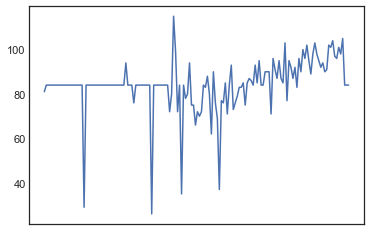

In [69]:
plt.plot(timeframe, duration_all_month_new_new)
plt.xticks([])

In [70]:
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.scale import mad
from scipy.stats import t as student_t

In [71]:
def stl(series: np.ndarray, period: int):
    """
    Seasonal-Trend decomposition
    series : numpy.array
        Time-series in ndarry
    periood : int
        Period of the seasonal component.
        For example, if the  time series is monthly with a yearly cycle, then
        freq=12.
    """
    decomp = sm.tsa.seasonal_decompose(series, period=period)
    return decomp.seasonal, decomp.trend, decomp.resid

In [72]:
from typing import List, Dict, Optional

In [73]:
def plot_ts(ts: List[float], labels: List[str] = None) -> None:
    if not labels:
        labels = list(range(len(ts)))
    plt.plot(labels, ts)
    plt.grid()
    plt.xlabel('date')
    plt.ylabel('Movie Length')
    plt.show()

In [74]:
seasonal, trend, resid = stl(np.array(duration_all_month_new_new), period=6)

Original Timeseries


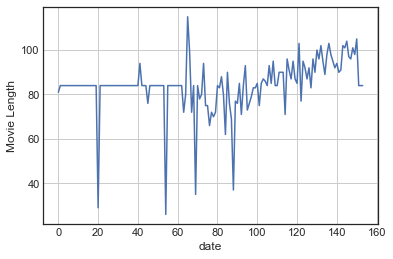

Seasonal Component


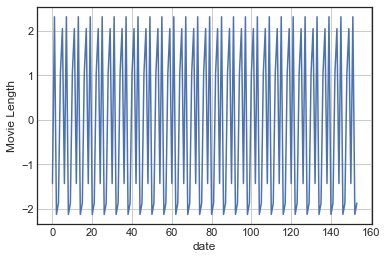

Trend Component


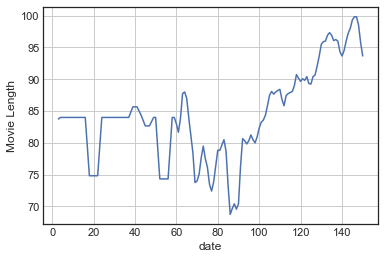

Residual Component


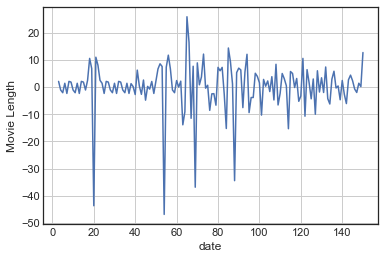

In [75]:
print('Original Timeseries')
plot_ts(duration_all_month_new_new)
print('Seasonal Component')
plot_ts(seasonal)
print('Trend Component')
plot_ts(trend)
print('Residual Component')
plot_ts(resid)

In [76]:
from statsmodels.robust.scale import mad
from scipy.stats import t as student_t
import math

In [77]:
def robust_seasonal_esd_test(ts, max_anom=5, seasonal=False, period=None, alpha=0.05, threshold=1.0):
    """Robust Seasonal Extreme Studentized Deviate Test"""
    
    series = np.copy(ts)
    # Implement the seasonal decomposition as an option
    if seasonal:
        if not period:
            raise RuntimeError("Period must be set if the time series is seasonal")
        # Remove the seasonal signal and median (based on the paper)
        series = series - stl(ts, period=7)[0] - np.median(series)
    
    N = len(series)
    ts_index = np.array(range(N))
    
    anom_list = []
    n_anom = 0
    for k in range(1, max_anom+1):
        
        # Compute the test statistic C_k
        C_k = max(abs(series-np.median(series)))/mad(series)
        
        # Determine the direction or anomaly
        direction = ("positive" if max(abs(series-np.median(series))) in series-np.median(series) else "negative")
        
        # Compute the critical value
        p = 1 - alpha / (2 * (N - k + 1))
        t = student_t.ppf(p, N - k - 1)
        lambda_k = (N - k) * t / ((N - k - 1+ t**2)*(N - k +1))**0.5


        # The score is defined as C_k / lambda_k
        # If the score > threshold, then take this data point as an anomaly
        score = C_k / lambda_k
        if score > threshold:
            n_anom = k
        else:
            break
        
        max_idx = np.argmax(abs(series-np.median(series)))
        
        anom_list.append({
            "rank": k,
            "index": int(ts_index[max_idx]),
            "value": float(ts[ts_index[max_idx]]),
            "direction": direction,
            "score": round(score, 2)
        })
            
        # Remove the identified value from both time-series and index
        series = np.delete(series, max_idx)
        ts_index = np.delete(ts_index, max_idx)
    return anom_list

In [78]:
def plot_anomaly_on_ts(ts: List[float], anom_index_list: List[int], anom_value_list: List[int]) -> None:
    """
    Plot timeseries chart together with detected anomalies as scatter points
    ts:
        The values of timeseries
    
    anom_index_list:
        The list of timeseries index for the detected anomalies, for instance, if the 2nd data point
        is identified as anomaly, the index will be 1 (since it starts from 0)
    
    anom_value_list:
        The list of values for the detected anomalies
    """
    labels = list(range(len(ts)))
    plt.plot(labels, ts)
    plt.scatter(anom_index_list, anom_value_list, s=50.0, c='red')
    plt.grid()
    plt.xlabel('date')
    plt.ylabel('# of appearance')
    plt.show()

def pretty_print(struct):
    """
    struct:
        The struct can be anything that is JSON serializable, like dictionary, or list.
    """
    print(json.dumps(struct, indent=2))


In [79]:
def plot_anomalies(timeseries):
    
    ts = np.array(timeseries)
    anom_list = robust_seasonal_esd_test(ts, threshold=1.1)

    # Only keep anomalies going up
    anom_index = []
    anom_value = []

    for i in anom_list:
        if i['direction'] == 'positive':
            anom_index.append(i['index'])
            anom_value.append(i['value'])

    plot_anomaly_on_ts(ts, anom_index, anom_value)

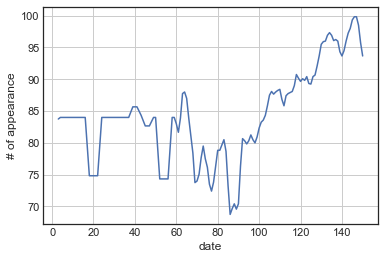

In [80]:
plot_anomalies(np.array(trend))

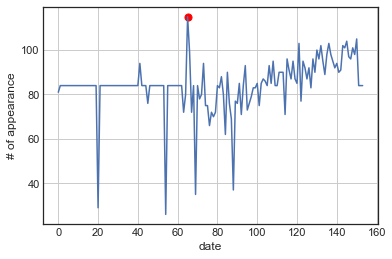

In [81]:
plot_anomalies(np.array(np.array(duration_all_month_new_new)))

In [82]:
df_us_alltime_tvshows = df_us_alltime[df_us_alltime['type'] == 'TV Show']
df_us_alltime_tvshows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age,clean_description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults,feud flirtation toilet talk among incarcerated...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021,Adults,arrival charismatic young priest brings glorio...


In [83]:
df_us_alltime_tvshows['duration'] = df_us_alltime_tvshows['duration'].apply(
    lambda x: int(x.split(' ')[0]))

In [84]:
df_us_alltime_tvshows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age,clean_description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults,feud flirtation toilet talk among incarcerated...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021,Adults,arrival charismatic young priest brings glorio...


In [85]:
duration_all_month = []
for i in sorted(df_us_alltime_tvshows['year_added'].unique()):
    df_us_alltime_tvshows_this_year = df_us_alltime_tvshows[df_us_alltime_tvshows['year_added'] == i]
    for t in ['January','February','March','April','May','June','July','August','October','November','December']:
        df_us_alltime_tvshows_this_year_this_month = df_us_alltime_tvshows_this_year[df_us_alltime_tvshows_this_year['month_added'] == t]
        duration_all_month.append(round(np.mean(df_us_alltime_tvshows_this_year_this_month['duration']),2))
duration_all_month

[nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 nan,
 nan,
 nan,
 nan,
 5.0,
 3.5,
 nan,
 nan,
 nan,
 3.0,
 nan,
 8.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 3.0,
 5.0,
 nan,
 4.0,
 7.0,
 1.0,
 nan,
 nan,
 1.0,
 nan,
 1.67,
 1.5,
 4.0,
 1.57,
 1.6,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.29,
 2.0,
 2.0,
 4.0,
 1.11,
 1.58,
 2.17,
 2.56,
 2.75,
 3.45,
 1.55,
 2.18,
 2.41,
 1.67,
 3.5,
 2.42,
 1.82,
 1.67,
 2.29,
 1.53,
 3.07,
 1.71,
 1.44,
 1.23,
 1.61,
 2.15,
 2.43,
 1.7,
 2.38,
 1.14,
 2.0,
 1.82,
 1.9,
 1.5,
 1.88,
 1.88,
 1.52,
 2.0,
 1.62,
 1.82,
 2.25,
 3.33,
 1.85,
 1.67,
 2.31,
 2.37,
 2.09,
 1.92,
 1.81,
 1.89,
 1.64,
 1.78,
 1.65,
 2.45,
 2.0,
 nan,
 nan,
 nan]

In [86]:
temp_str = ','.join(str(x) for x in duration_all_month)
temp_str = temp_str.replace('nan', str(np.nanmean(duration_all_month)))
duration_all_month = [x for x in temp_str.split(',')]
duration_all_month_new = []
for i in duration_all_month:
    duration_all_month_new.append(i)
duration_all_month_new

['2.1999999999999997',
 '1.0',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '1.0',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '5.0',
 '3.5',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '3.0',
 '2.1999999999999997',
 '8.0',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '2.1999999999999997',
 '3.0',
 '5.0',
 '2.1999999999999997',
 '4.0',
 '7.0',
 '1.0',
 '2.1999999999999997',
 '2.1999999999999997',
 '1.0',
 '2.1999999999999997',
 '1.67',
 '1.5',
 '4.0',
 '1.57',
 '1.6',
 '1.0',
 '1.0',
 '1.0',
 '1.0',
 '2.0',
 '1.0',
 '1.29',
 '2.0',
 '2.0',
 '4.0',
 '1.11',
 '1.58',
 '2.17',
 '2.56',
 '2.75',
 '3.45',
 '1.55',
 '2.18',
 '2.41',
 '1.67',
 '3.5',
 '2.42',
 '1.82'

In [87]:
duration_all_month_new_new = []
for i in duration_all_month_new:
    duration_all_month_new_new.append(float(i))

In [88]:
timeframe = [i for i in range(len(duration_all_month_new_new))]

([], [])

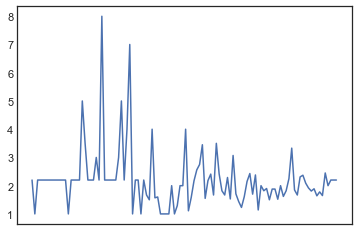

In [89]:
plt.plot(timeframe, duration_all_month_new_new)
plt.xticks([])

In [90]:
seasonal, trend, resid = stl(np.array(duration_all_month_new_new), period=6)

Original Timeseries


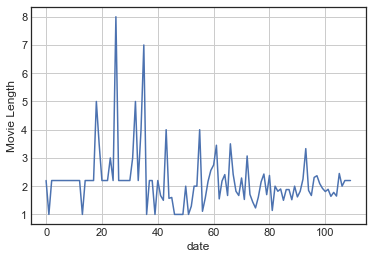

Seasonal Component


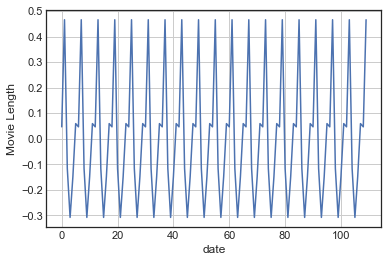

Trend Component


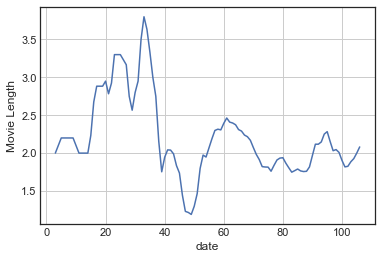

Residual Component


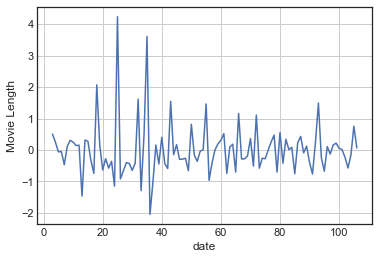

In [91]:
print('Original Timeseries')
plot_ts(duration_all_month_new_new)
print('Seasonal Component')
plot_ts(seasonal)
print('Trend Component')
plot_ts(trend)
print('Residual Component')
plot_ts(resid)

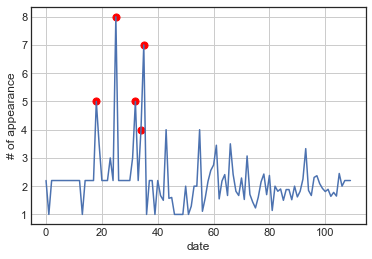

In [92]:
plot_anomalies(np.array(np.array(duration_all_month_new_new)))

## 4. Genres Trends

In [93]:
df_us_alltime.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,targeted_age,clean_description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021,Teens,father nears end life filmmaker kirsten johnso...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,Adults,protect family powerful drug lord skilled thie...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,Adults,feud flirtation toilet talk among incarcerated...


In [94]:
alltime_tokens = []
for i in df_us_alltime['listed_in']:
    for t in i.split(','):
        alltime_tokens.append(t.strip())
alltime_genres = pd.Series(dict(sorted(Counter(alltime_tokens).items(),key = lambda x:x[1], reverse = True)))
alltime_genres.head(3)

Dramas           945
Comedies         774
Documentaries    587
dtype: int64

In [95]:
recent_tokens = []
for i in df_us_recent_three_years['listed_in']:
    for t in i.split(','):
        recent_tokens.append(t.strip())
recent_tokens = pd.Series(dict(sorted(Counter(recent_tokens).items(),key = lambda x:x[1], reverse = True)))
recent_tokens.head(10)

Dramas                      661
Comedies                    588
Action & Adventure          360
Children & Family Movies    352
Documentaries               277
International Movies        273
Thrillers                   225
TV Comedies                 224
Independent Movies          221
TV Dramas                   207
dtype: int64

In [96]:
recent_tokens

Dramas                          661
Comedies                        588
Action & Adventure              360
Children & Family Movies        352
Documentaries                   277
International Movies            273
Thrillers                       225
TV Comedies                     224
Independent Movies              221
TV Dramas                       207
Romantic Movies                 203
International TV Shows          191
Kids' TV                        182
Docuseries                      172
Horror Movies                   152
Reality TV                      133
Sci-Fi & Fantasy                131
Music & Musicals                126
Crime TV Shows                  124
Stand-Up Comedy                  92
Sports Movies                    85
TV Action & Adventure            82
Romantic TV Shows                82
Classic Movies                   66
TV Sci-Fi & Fantasy              48
Cult Movies                      44
LGBTQ Movies                     43
Science & Nature TV         

In [97]:
total = 0
for i in recent_tokens:
    total+=i
total

5685

In [98]:
genre_by_year = defaultdict(dict)

In [99]:
for i in sorted(df_us_alltime['year_added'].unique()):
    df_us_this_year = df_us_alltime[df_us_alltime['year_added'] == i]
    this_year_token = []
    for k in df_us_this_year['listed_in']:
        for t in k.split(','):
            this_year_token.append(t.strip())
            token_count_sum = len(this_year_token)
            token_counts = pd.Series(dict(sorted(Counter(this_year_token).items(),key = lambda x:x[1], reverse = True)))
            for w in set(this_year_token):
                this_token_count = token_counts[w]
                this_token_percent = round(this_token_count/token_count_sum,2)
                genre_by_year[i][w] = this_token_percent * (1+np.log(this_token_count))

In [100]:
genre_by_year

defaultdict(dict,
            {2008: {'Dramas': 0.25,
              'Independent Movies': 0.25,
              'Thrillers': 0.25,
              'Stand-Up Comedy & Talk Shows': 0.25},
             2009: {'Horror Movies': 1.0},
             2010: {'Cult Movies': 0.5, 'Horror Movies': 0.5},
             2011: {'Dramas': 2.47428372134948,
              'Sports Movies': 0.20317766166719345,
              'Thrillers': 0.06,
              'Children & Family Movies': 0.06,
              'Faith & Spirituality': 0.06},
             2012: {'Documentaries': 0.25,
              'Comedies': 0.8465735902799727,
              'Children & Family Movies': 0.25},
             2013: {'Children & Family Movies': 0.1523832462503951,
              'Comedies': 0.05,
              'Music & Musicals': 0.05,
              'Documentaries': 0.05,
              'Sports Movies': 0.05,
              'Stand-Up Comedy': 0.2938057204135354,
              'TV Dramas': 0.4295329850015803,
              'TV Mysteries': 0.05

In [101]:
for i in genre_by_year.items():
    print(i[1].get('Dramas'))

0.25
None
None
2.47428372134948
None
None
None
0.16750556815368328
0.2953213077407741
0.552178857704904
0.6596933501140526
0.7017887088894506
0.7599262551918442
0.7761672169362157


In [102]:
def plot_genres_trend_overtime(genre):
    years = []
    trend = []
    for i in genre_by_year.items():
        if genre in list(i[1].keys()):
            years.append(i[0])
            trend.append(i[1].get(genre))
    plt.plot(years, trend)
    plt.title(genre)

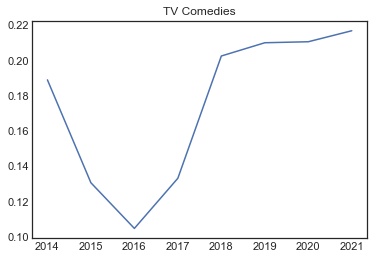

In [103]:
plot_genres_trend_overtime('TV Comedies')

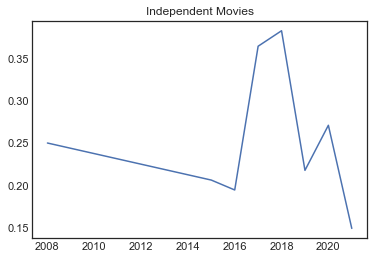

In [104]:
plot_genres_trend_overtime('Independent Movies')

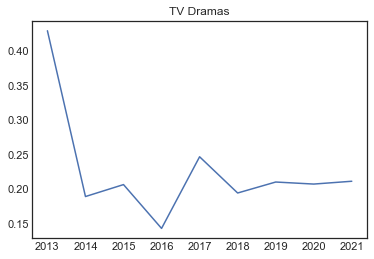

In [105]:
plot_genres_trend_overtime('TV Dramas')

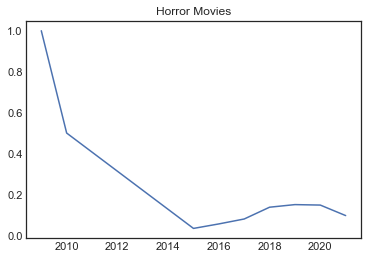

In [106]:
plot_genres_trend_overtime("Horror Movies")

In [107]:
recent_tokens.head(20)

Dramas                      661
Comedies                    588
Action & Adventure          360
Children & Family Movies    352
Documentaries               277
International Movies        273
Thrillers                   225
TV Comedies                 224
Independent Movies          221
TV Dramas                   207
Romantic Movies             203
International TV Shows      191
Kids' TV                    182
Docuseries                  172
Horror Movies               152
Reality TV                  133
Sci-Fi & Fantasy            131
Music & Musicals            126
Crime TV Shows              124
Stand-Up Comedy              92
dtype: int64

In [108]:
alltime_genres.head(10)

Dramas                      945
Comedies                    774
Documentaries               587
Children & Family Movies    496
Action & Adventure          446
Independent Movies          401
International Movies        375
TV Comedies                 333
TV Dramas                   332
Thrillers                   320
dtype: int64

In [109]:
total

5685

In [110]:
np.log(250)

5.521460917862246